In [156]:
import numpy as np
import matplotlib.pyplot as plt
import math
from decimal import Decimal, getcontext

# Runge-Kutta 4 för ODE

In [103]:
N=91

In [312]:
def RK4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    for i in range(n-1):
        h = t[i+1] - t[i]
        k1 = h*f(t[i], y[i])
        k2 = h*f(t[i] + h/2, y[i] + k1/2)
        k3 = h*f(t[i] + h/2, y[i] + k2/2)
        k4 = h*f(t[i] + h, y[i] + k3)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return y

# 3 Existens men inte entydighet
y' = sqrt(abs(y))

In [42]:
f3 = lambda t, y: math.sqrt(abs(y))

a. y(0)=0

Text(0.5, 1.0, 'RK4 y(0) = 0')

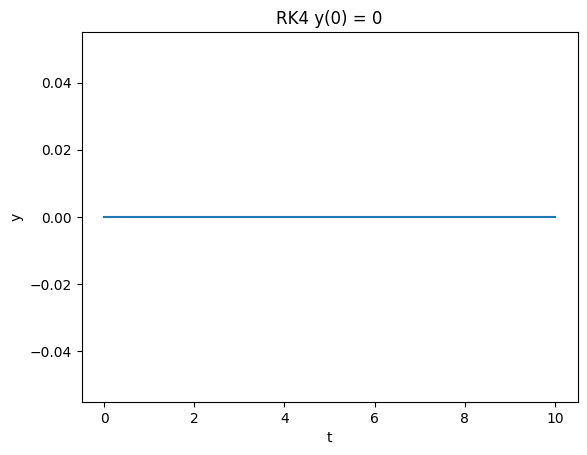

In [134]:
h = 0.1
t = np.linspace(0, 10, int(10/h))
y = RK4(f3, 0, t)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.title('RK4 y(0) = 0')

Text(0.5, 1.0, 'RK4 y(-1) = -1')

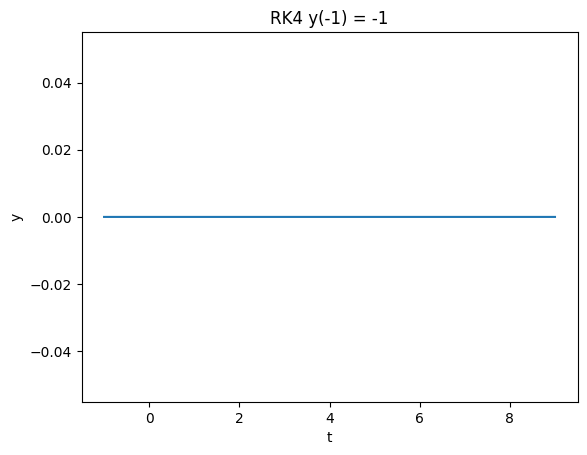

In [277]:
# t, y = RK4(f3, -1, -1, 9, 1e-3)
h = 1e-3
t = np.linspace(-1, 9, int(10/h))
y = RK4(f3, -1+0.999999999999, t)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.title('RK4 y(-1) = -1')

# find first value of our solution which fulfills abs(y) < 1e-4
# t_stuck = (t[np.where(abs(y) < 1e-4)])
# t_first_stuck = t_stuck[0]
# t_last_stuck = t_stuck[-1]
# # shade this region
# plt.axvspan(t_first_stuck, t_last_stuck, color='red', alpha=0.2)
# print(t_last_stuck - t_first_stuck)

#0.03999899999892986

# 4. PANG
y' = y^2

In [70]:
f4 = lambda t, y: y**2

/var/folders/q5/6vbw5t_91_l67h7nh6f4cqph0000gn/T/ipykernel_41960/79422809.py:1: RuntimeWarning: overflow encountered in scalar power
  f4 = lambda t, y: y**2


Text(0.5, 1.0, 'RK4 y(0) = 0.91, end=1.098903')

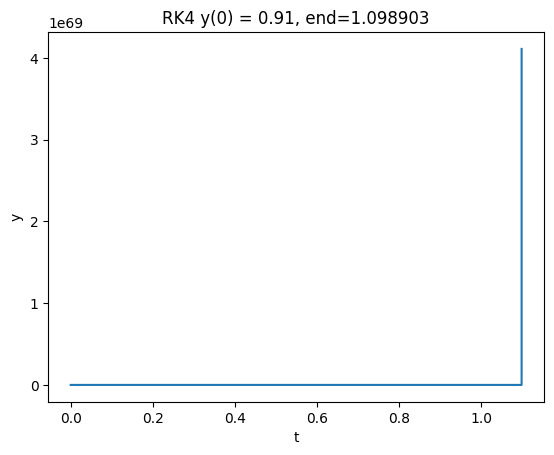

In [136]:
C = N/100
h = 1e-6
t = np.linspace(0, 1.5, int(1.5/h))
y = RK4(f4, C, t)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
t_last = t[(np.where(np.isfinite(y)))][-1]
plt.title(f'RK4 y(0) = 0.91, end={t_last:.6f}')


# 5. Inte PANG
y'=y

In [126]:
f5 = lambda t, y: y

In [295]:
k = 6
max = 2**k
h = 0.000001
t = np.linspace(0, max, int(max/h))
y = RK4(f5, N, t)

for i in range(k+1):
    y_num = y[int(2**i/h)]
    y_an = N*math.exp(2**i)
    if abs(y_num - y_an) < 0.005:
        print(f'i={i}, y_num={y_num}, y_an={y_an}')
    

k=0, y_num=247.36365025483343, y_an=247.3636463897731
k=1, y_num=672.4041260152945, y_an=672.4041050026892
k=2, y_num=4968.431963542687, y_an=4968.431653016126


IndexError: index 64000000 is out of bounds for axis 0 with size 64000000

# 6 Vad är π?
y'' + y' = 0

In [301]:
def RK4_0(f, y0, h):
    # RK4 which ends at y = 0. We want to find t at this point.
    # if
    getcontext().prec = 40
    y = np.array([Decimal(str(x)) for x in y0], dtype=object)
    t = Decimal(0)
    while True:
        k1 = h*f(t, y)
        k2 = h*f(t + h/2, y + k1/2)
        k3 = h*f(t + h/2, y + k2/2)
        k4 = h*f(t + h, y + k3)
        y_new = y + (k1 + 2*k2 + 2*k3 + k4)/6
        t_new = t + h
        if y_new[0] < 0:
            if abs(y_new[0]) < Decimal('1e-30'):
                # use linear interpolation between last two points
                return t_new
            h /= 2
            continue
        y = y_new
        t = t_new

In [229]:
f6 = lambda t, y: np.array([-y[1], y[0]])

In [306]:
t = RK4_0(f6, [1, 0], Decimal('1e-5'))
pi_est = 2*t
pi = Decimal('3.141592653589793238462643383279')
# want it correct to 20 decimal places
est_str = f'{pi_est:.22f}'
pi_str = f'{pi:.22f}'
print(est_str)
print(pi_str)

3.1415926535897932384629
3.1415926535897932384626


# 7 Newton!

In [335]:
def f7(t, y):
    GM = 6.67408e-11 * 5.972e24
    return np.array(
        [y[2], 
         y[3],
         -GM*y[0]/(y[0]**2 + y[1]**2)**(3/2),
         -GM*y[1]/(y[0]**2 + y[1]**2)**(3/2)]
        )

(-201529491.29198232, 9596643.490094397, -152462850.57248643, 7260136.78916602)

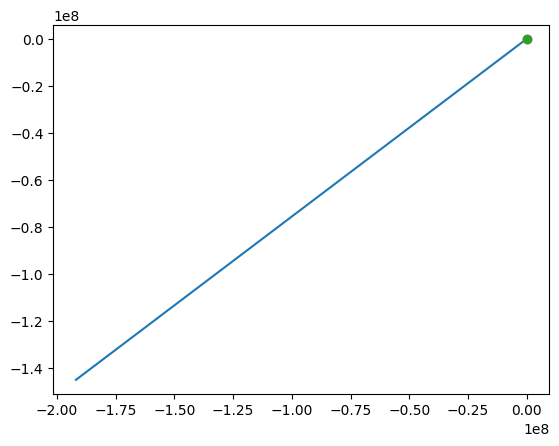

In [345]:
AU = 1.496e11  # meters
T = 365.25*24*3600  # seconds in a year
v_orbital = 2 * np.pi * AU / T  # m/s
y0 = np.array([AU, 0, 0, v_orbital])
t = np.linspace(0, T, 365*1000)  # Using 10 steps per day

y = RK4(f7, np.array([1, 1, -1, 1/2]), t)
plt.plot(y[:,0], y[:,1])
plt.plot(y[0,0], y[0,1], 'o')
plt.plot(0, 0, 'o')
plt.axis('equal')